In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("../data/marketing_campaign.csv")

In [3]:
data.isna().any().all()

False

In [4]:
data.dropna(inplace=True)

In [5]:
data.drop(['ID'],axis=1,inplace=True)

#### Feature Engineering

In [6]:
# creating the age column
CURRENT_YEAR = 2024
age = CURRENT_YEAR - data["Year_Birth"] 

In [7]:
data["customer_age"] = age

In [8]:
cols = data.columns.to_list()

In [9]:
cols = cols[:-2] + cols[-1:] + cols[-2:-1]

In [10]:
data = data[cols].copy()

In [11]:
def no_of_years(date):
    date = date.split('-')
    cus_since = CURRENT_YEAR - int(date[2])
    return cus_since

In [12]:
cus_since = data['Dt_Customer'].apply(no_of_years)
data['Dt_Customer'] = cus_since

In [13]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,customer_age,Response
0,1957,Graduation,Single,58138.0,0,0,12,58,635,88,...,0,0,0,0,0,0,3,11,67,1
1,1954,Graduation,Single,46344.0,1,1,10,38,11,1,...,0,0,0,0,0,0,3,11,70,0
2,1965,Graduation,Together,71613.0,0,0,11,26,426,49,...,0,0,0,0,0,0,3,11,59,0
3,1984,Graduation,Together,26646.0,1,0,10,26,11,4,...,0,0,0,0,0,0,3,11,40,0
4,1981,PhD,Married,58293.0,1,0,10,94,173,43,...,0,0,0,0,0,0,3,11,43,0


In [14]:
X = data.drop(['Response'],axis=1)
y = data['Response']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
train_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test,y_test])

In [17]:
train_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,customer_age,Response
209,1954,Graduation,Divorced,64497.0,0,1,12,17,1170,48,...,1,0,0,0,0,0,3,11,70,1
53,1977,Graduation,Divorced,82582.0,0,0,10,54,510,120,...,1,0,0,1,0,0,3,11,47,1
184,1961,Basic,Married,28249.0,0,0,10,80,1,9,...,0,0,0,0,0,0,3,11,63,0
2115,1969,Master,Together,66476.0,0,1,11,80,742,28,...,0,0,0,0,0,0,3,11,55,0
728,1965,Master,Married,56962.0,2,1,11,60,292,3,...,0,0,0,0,0,0,3,11,59,0


#### Data Preprocessing

In [18]:
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

In [19]:
encoder = LabelEncoder()

In [21]:
X_train[categorical_features] = X_train[categorical_features].apply(encoder.fit_transform)

Feature Scaling

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.200286,-0.361924,-1.600242,0.471252,-0.806360,0.887909,1.494562,-1.104785,2.596464,0.541485,...,1.105915,3.598994,-0.288322,-0.287172,-0.259750,-0.12439,-0.098421,0.0,0.0,1.200286
1,0.693445,-0.361924,-1.600242,1.170739,-0.806360,-0.939471,-1.402991,0.178325,0.621129,2.353688,...,-1.770531,3.598994,-0.288322,-0.287172,3.849861,-0.12439,-0.098421,0.0,0.0,-0.693445
2,-0.623933,-1.250193,-0.676283,-0.930739,-0.806360,-0.939471,-1.402991,1.079970,-0.902272,-0.440125,...,0.284073,-0.277855,-0.288322,-0.287172,-0.259750,-0.12439,-0.098421,0.0,0.0,0.623933
3,0.034756,0.526344,1.171634,0.547795,-0.806360,0.887909,0.045785,1.079970,1.315489,0.038095,...,-0.537768,-0.277855,-0.288322,-0.287172,-0.259750,-0.12439,-0.098421,0.0,0.0,-0.034756
4,-0.294589,0.526344,-0.676283,0.179815,2.934135,0.887909,0.045785,0.386397,-0.031330,-0.591142,...,0.694994,-0.277855,-0.288322,-0.287172,-0.259750,-0.12439,-0.098421,0.0,0.0,0.294589


#### Dimensionality Reduction

In [27]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(X_train)
PCA_ds = pd.DataFrame(pca.transform(X_train), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1772.0,-3.608851e-17,2.546014,-4.728960,-2.316528,-0.611649,2.086423,7.319803
col2,1772.0,0.000000e+00,1.606884,-4.160660,-1.243056,0.016280,1.237905,5.822639
col3,1772.0,2.606393e-17,1.336447,-5.733203,-0.837081,0.089502,0.878052,5.860899


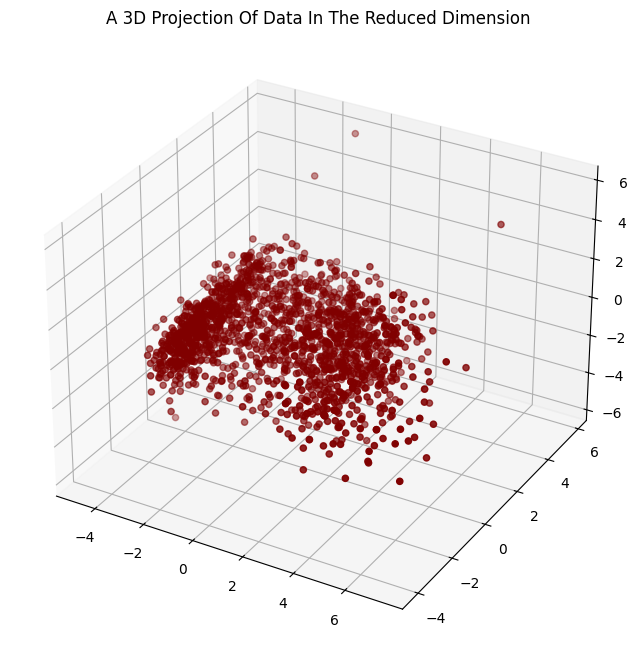

In [29]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

#### CLustering
Using Agglomerative Clustering algorithm; this is nothing but a hierarchial clustering method. Involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

- Elbow Method to determine the number of clusters to be formed
- Clustering via Agglomerative Clustering
- Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


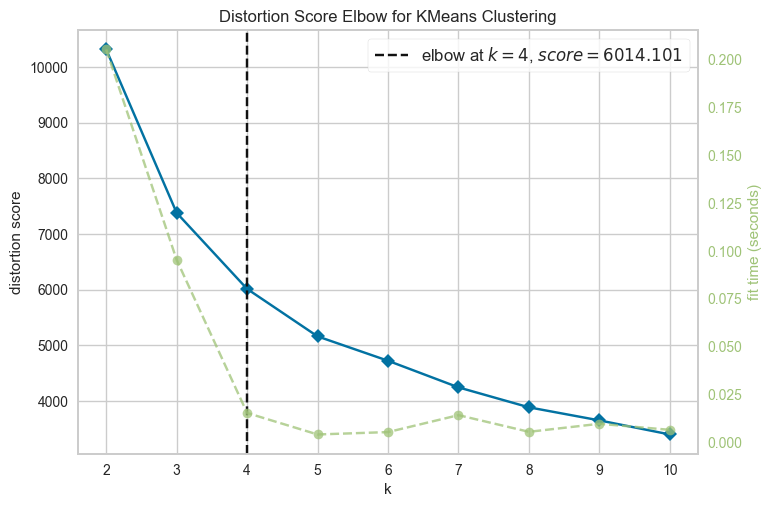

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

This indicates that 4 will be the optimum number of clusters required for this data.

In [34]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
X_train["Clusters"]= yhat_AC

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices